# Import library

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt 

## Import data

In [2]:
df = pd.read_csv('Sales Reporting/sales2019_1.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


## Clean and proceed data

In [68]:
frames=[]
i= 1 
for file in os.listdir('Sales Reporting'):
    df1 = pd.read_csv('Sales Reporting/'+file)
    frames.append(df1)
    result = pd.concat(frames)
df = result
df.to_csv('annualsales2019.csv',index  =False)

In [67]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Add Month column

In [70]:
df['Month'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [71]:
print(set(df['Month']))

{nan, '11', '02', '05', '03', '08', '07', '09', '01', 'Or', '12', '04', '10', '06'}


## Get rid of 'NAN' and 'Or' value

In [72]:
df = df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [75]:
df = df[df['Month'] != 'Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
11682,259354,iPhone,1.0,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
11683,259355,iPhone,1.0,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
11684,259356,34in Ultrawide Monitor,1.0,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


# Reporting

### What was the best sales? How much was earn that month?

In [76]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast="float")
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

float32
float32


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [65]:
moving_column = df.pop('Sales')
df.insert(4,'Sales',moving_column)
df

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Purchase Address,Month
0,141234,iPhone,1.0,700.000000,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1.0,14.950000,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2.0,11.990000,23.980000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1.0,149.990005,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1.0,11.990000,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3.0,2.990000,8.970000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1.0,700.000000,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1.0,700.000000,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1.0,379.989990,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [77]:
# Revenue by month
df.groupby('Month').sum()['Sales']

Month
01    1822256.75
02    2202022.50
03    2807100.25
04    3390670.25
05    3152606.75
06    2577802.25
07    2647775.75
08    2244467.75
09    2097560.00
10    3736726.75
11    3199603.25
12    4613443.50
Name: Sales, dtype: float32

In [78]:
# The best value by month
sales_value = df.groupby('Month').sum()['Sales']
sales_value.max()

4613443.5

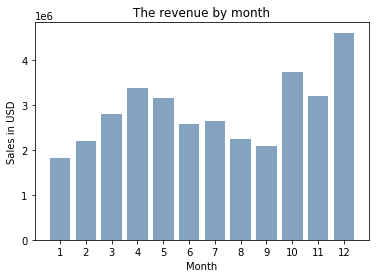

In [136]:
months = range(1,13)
plt.bar(x= months, height = sales_value,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(months,size=10)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.title("The revenue by month")
plt.show()

## What city has the best sales?

In [80]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [81]:
address_to_city = lambda address:address.split(',')[1]
df['City'] = df['Purchase Address'].apply(address_to_city)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1.0,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1.0,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2.0,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1.0,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1.0,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [85]:
# The value by City
df.groupby('City').sum()['Sales']

City
 Atlanta          2795498.50
 Austin           1819581.75
 Boston           3661642.00
 Dallas           2767975.50
 Los Angeles      5452571.00
 New York City    4664317.50
 Portland         2320490.50
 San Francisco    8262204.00
 Seattle          2747755.50
Name: Sales, dtype: float32

In [86]:
# The best value by City
sales_value_city = df.groupby('City').sum()['Sales']
sales_value_city.max()

8262204.0

In [90]:
cities = [city for city, sales in sales_value_city.items()]

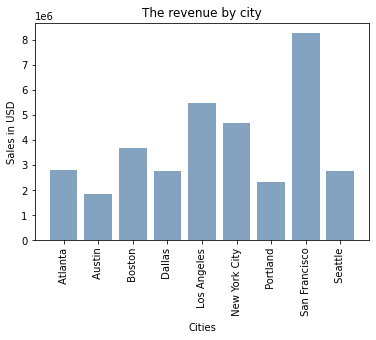

In [103]:
plt.bar(x= cities, height = sales_value_city,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(cities ,rotation = 90, size=10)
plt.xlabel('Cities')
plt.ylabel('Sales in USD')
plt.title("The revenue by city")
plt.show()

### When should we show ads to maximize the customer's ability to buy the product?

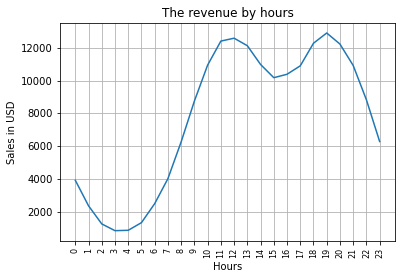

In [107]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Hours'] = df['Order Date'].dt.hour
sales_value_hours = df.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xticks(hours, rotation=90, size=8)
plt.xlabel('Hours')
plt.ylabel('Sales in USD')
plt.title("The revenue by hours")
plt.show()

## What products are most often sold together?

In [138]:
df_dup = df[df['Order ID'].duplicated(keep=False)]
groupProduct = lambda product: ', '.join(product)
df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)
df_dup = df_dup[['Order ID', 'All Products']].drop_duplicates()
df_dup['All Products'].value_counts().head(10)

C:\Users\admin\AppData\Local\Temp\ipykernel_17748\427715042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['All Products'] = df_dup.groupby('Order ID')['Product'].transform(groupProduct)


iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
Name: All Products, dtype: int64

## Which product sells the most?

In [145]:
# The revenue by products
all_products = df.groupby('Product').sum()['Quantity Ordered']
all_products

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float32

In [146]:
# Best - selling product 
all_products.max()

31017.0

C:\Users\admin\AppData\Local\Temp\ipykernel_17748\4060798423.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=10)


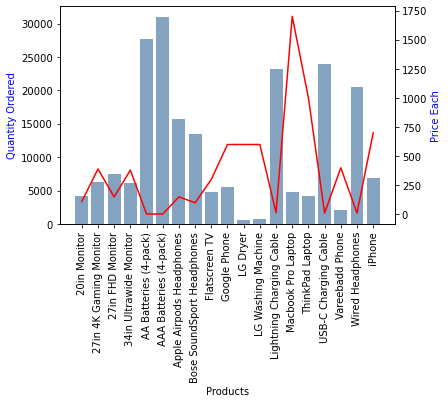

In [135]:
all_products = df.groupby('Product').sum()['Quantity Ordered']
prices = df.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color=(0.2, 0.4, 0.6, 0.6))
ax2.plot(x, y2, 'r')

ax1.set_xticklabels(products_ls, rotation=90, size=10)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Price Each', color='b')

plt.show()

In [137]:
df.to_csv('annualsales2019.csv',index  =False)